# 7 Principle Component Analysis and K-Means Clustering
# 7.2 PCA

## Part 1: Load Example Dataset

In [1]:
# import key libraries (remember to pip install numpy etc. first)
import numpy as np
import sys
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import csv data
PATH="./data/"
DATA="ex7data1.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
X = mat['X']

Visualizing example dataset for PCA.




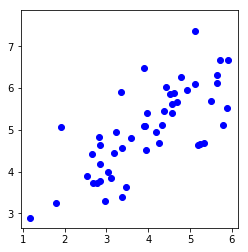

In [3]:
def pltData():
    plt. plot(X[:, 0], X[:, 1], 'bo')
    plt.axis([0.5, 6.5, 2, 8])
    plt.axis('square');

print('Visualizing example dataset for PCA.\n\n')
pltData()

## Part 2: Principal Component Analysis

In [4]:
def featureNormalize(X):
#FEATURENORMALIZE Normalizes the features in X 
#   FEATURENORMALIZE(X) returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation
#   is 1. This is often a good preprocessing step to do when
#   working with learning algorithms.
    mu = np.mean(X, axis=0)
    X_norm = X-mu
    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm/sigma
    return X_norm, mu, sigma

In [5]:
def pca(X):
#PCA Run principal component analysis on the dataset X
#   [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
#   Returns the eigenvectors U, the eigenvalues (on diagonal) in S

    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    sigma = X.T @ X / m #  Covariance of X: n x m x m x n = n x n

    U, S, Vh = np.linalg.svd (sigma) # find the eigenvectors (Principal Components) U and S diagnal matrix which helps with the projection error or invcerse which is the variance retained
    return U, S

In [6]:
def drawLine(p1, p2, typ='-k', width=2):
    #DRAWLINE Draws a line from point p1 to point p2
    #   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
    #   current figure

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], typ, linewidth=width)

In [7]:
print('Running PCA on example dataset.\n\n')

Running PCA on example dataset.




Top eigenvector: 

 U(:,1) =  -0.7071067811865475 -0.7071067811865477

(you should expect to see -0.707107 -0.707107)



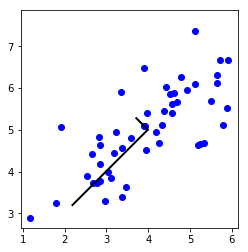

In [8]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Compute mu, the mean of the each feature

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
pltData()
drawLine(mu, mu + 1.5 * S[0] * U[:,0].T);
drawLine(mu, mu + 1.5 * S[1] * U[:,1].T);

print('Top eigenvector: \n');
print(' U(:,1) = ', U[0,0], U[1,0])
print('\n(you should expect to see -0.707107 -0.707107)\n');


## Part 3: Dimension Reduction

In [9]:
def projectData(X, U, K):
#PROJECTDATA Computes the reduced data representation when projecting only
#on to the top k eigenvectors
#   Z = projectData(X, U, K) computes the projection of
#   the normalized inputs X into the reduced dimensional space spanned by
#   the first K columns of U. It returns the projected examples in Z.

    Z = np.zeros((X.shape[0], K)) # m x k

    U_reduce = U[:, 0:K] 

    Z = X @ U_reduce

    return Z


In [10]:
def recoverData(Z, U, K):
#RECOVERDATA Recovers an approximation of the original data when using the
#projected data
#   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the
#   original data that has been reduced to K dimensions. It returns the
#   approximate reconstruction in X_rec.

# You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    U_reduce = U[:, 0:K] # n x k
    X_rec = Z @ U_reduce.T #  m x k X k x n ==> m x n original
    return X_rec


Dimension reduction on example dataset.


Projection of the first example:  [1.48127391]

(this value should be about 1.481274)


Approximation of the first example: %f %f
 -1.0474188259204964 -1.0474188259204966

(this value should be about  -1.047419 -1.047419)




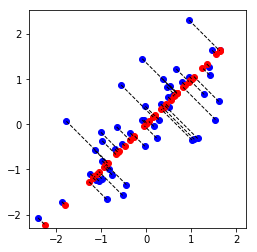

In [13]:
print('\nDimension reduction on example dataset.\n\n');

#  Plot the normalized dataset (returned from pca)
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.axis([-4, 3, -4, 3])
plt.axis('square')

#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: ', Z[0])
print('\n(this value should be about 1.481274)\n\n')

X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: %f %f\n', X_rec[0, 0], X_rec[0, 1])
print('\n(this value should be about  -1.047419 -1.047419)\n\n')

#  Draw lines connecting the projected points to the original points
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro');
for i in range (X_norm.shape[0]):
    drawLine(X_norm[i,:], X_rec[i,:], '--k', 1)

## Part 4: Loading and Visualizing Face Data 

In [53]:
import math

In [76]:
def displayData(s, sz=32):
    import math
    fs = int(math.sqrt(s.shape[0]))
    fig, axarr = plt.subplots(nrows=fs, ncols=fs,figsize=(10,10))    
    ind = -1
    for i in range(fs):
        for j in range(fs):
            ind +=1
            if (ind+1 > s.shape[0]): 
                break
            #print (ind, s.shape[0])
            #ind = np.random.randint(s.shape[0])
            tmp = s[ind,:].reshape(sz,sz, order='F')
            axarr[i,j].imshow(tmp, cmap='gray')
            plt.setp(axarr[i,j].get_xticklabels(), visible=False)
            plt.setp(axarr[i,j].get_yticklabels(), visible=False)
    fig.subplots_adjust(hspace=0, wspace=0)   

In [77]:
print('\nLoading face dataset.\n\n');

DATA="ex7faces.mat"
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
X = mat['X']




Loading face dataset.




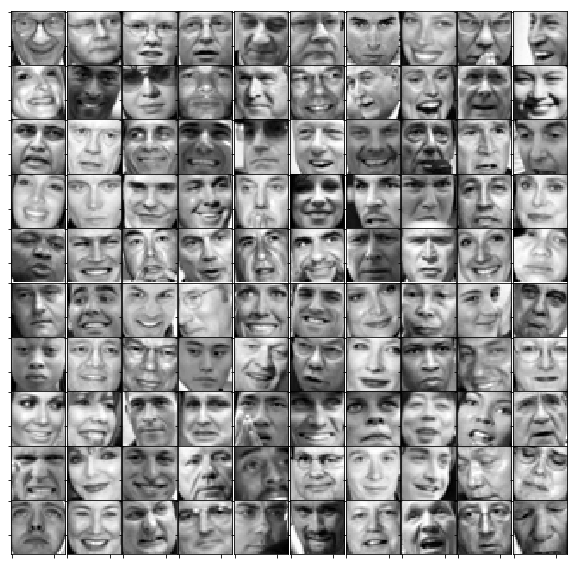

In [84]:
#  Display the first 100 faces in the dataset
displayData(X[0:100, :])

## Part 5: PCA on Face Data: Eigenfaces


Running PCA on face dataset.
(this might take a minute or two ...)




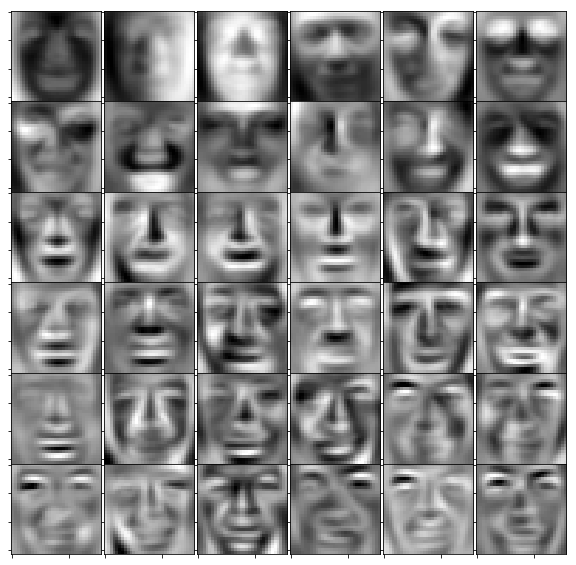

In [79]:
print('\nRunning PCA on face dataset.\n(this might take a minute or two ...)\n\n')

#  Before running PCA, it is important to first normalize X by subtracting
#  the mean value from each feature
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm);

#  Visualize the top 36 eigenvectors found
displayData(U[:, 0:36].T)

## Part 6: Dimension Reduction for Faces

In [80]:
print('\nDimension reduction for face dataset.\n')

K = 100
Z = projectData(X_norm, U, K)

print(f'The projected data Z has a size of: {Z.shape} vs. {X.shape} for original data')



Dimension reduction for face dataset.

The projected data Z has a size of: (5000, 100) vs. (5000, 1024) for original data


## Part 7: Visualization of Faces after PCA Dimension Reduction


Visualizing the projected (reduced dimension) faces.




Text(0.5,0.98,'Recovered faces')

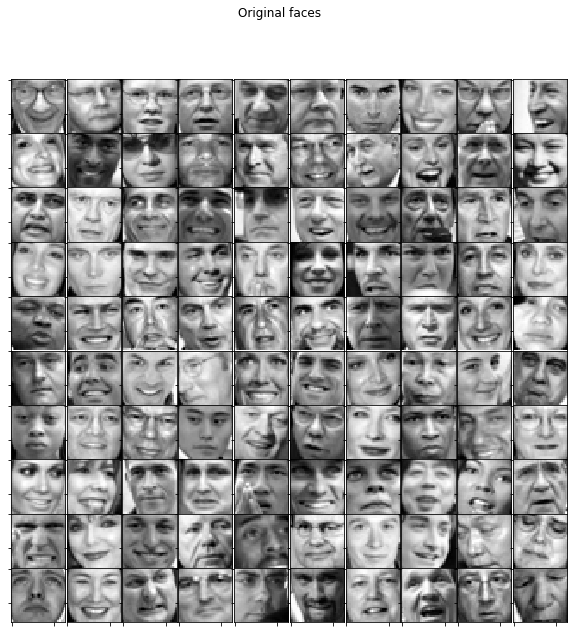

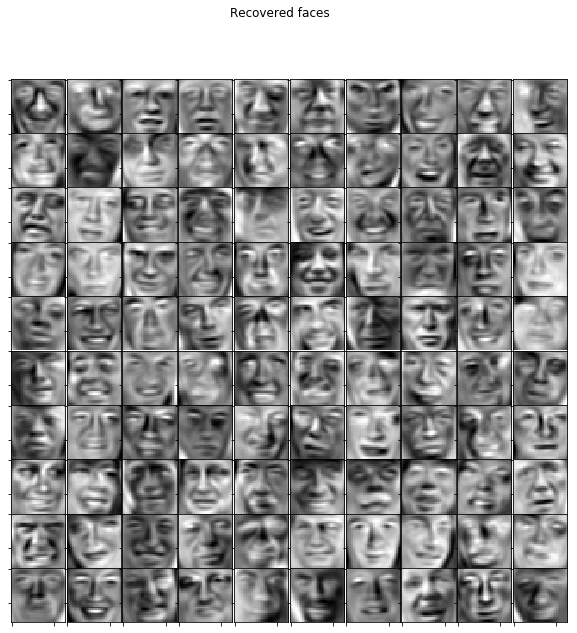

In [89]:
print('\nVisualizing the projected (reduced dimension) faces.\n\n');

K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
displayData(X[0:100,:])
plt.suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
displayData(X_rec[0:100,:])
plt.suptitle('Recovered faces')


## Part 8(a): Optional (ungraded) Exercise: PCA for Visualization

In [91]:
# import csv data
PATH="./data/"
DATA="bird_small.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
A255 = mat['A']
A = A255 / 255 # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape

X = A.reshape(img_size[0] * img_size[1], 3)
K = 16
max_iters = 10

In [95]:
def kMeansInitCentroids(X, K):
    #KMEANSINITCENTROIDS This function initializes K centroids that are to be
    #used in K-Means on the dataset X
    #   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
    #   used with the K-Means on the dataset X
    #

    # You should return this values correctly
    centroids = np.zeros((K, X.shape[1]))

    # Initialize the centroids to be random examples
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[0:K], :]
    
    return centroids

In [96]:
def findClosestCentroids(X, centroids):
    #FINDCLOSESTCENTROIDS computes the centroid memberships for every example
    #   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
    #   in idx for a dataset X where each row is a single example. idx = m x 1
    #   vector of centroid assignments (i.e. each entry in range [1..K])
    # Set K
    K = centroids.shape[0]    
    m = X.shape[0]
    idx = np.zeros((m, 1))
    
    # loop over every example
    for i in np.arange(m):
        #iterate over every
        min_norm = 1e10 # track the minimum norm
        min_norm_j = -1. # track the smallest norm - make wrong initially.
        for j in np.arange(K):
            # calculate the norm
            norm = np.sum((X[i,:].T - centroids[j,:].T)**2)
            if norm < min_norm:
                min_norm = norm
                min_norm_j = j
        if min_norm_j == -1:
            print('ERROR:   MIN NORM J IS -1 no index selected') # should never happen
        idx[i]=min_norm_j
    return idx

In [99]:
def computeCentroids(X, idx, K):
#COMPUTECENTROIDS returns the new centroids by computing the means of the
#data points assigned to each centroid.
#   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by
#   computing the means of the data points assigned to each centroid. It is
#   given a dataset X where each row is a single data point, a vector
#   idx of centroid assignments (i.e. each entry in range [1..K]) for each
#   example, and K, the number of centroids. You should return a matrix
#   centroids, where each row of centroids is the mean of the data points
#   assigned to it.

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))

    for i in np.arange (K):
        centroids[i,:]=np.mean(X[np.argwhere(idx==i)[:,0],:], axis=0)

    return centroids


In [100]:
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    #RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
    #is a single example
    #   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
    #   plot_progress) runs the K-Means algorithm on data matrix X, where each 
    #   row of X is a single example. It uses initial_centroids used as the
    #   initial centroids. max_iters specifies the total number of interactions 
    #   of K-Means to execute. plot_progress is a true/false flag that 
    #   indicates if the function should also plot its progress as the 
    #   learning happens. This is set to false by default. runkMeans returns 
    #   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
    #   vector of centroid assignments (i.e. each entry in range [1..K])

    # Plot the data if we are plotting progress
    if plot_progress:
        plt.figure()

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    
    #centroids_history = np.zeros(max_iters,2)
    #centroids_history[0] = [centroids, previous_centroids]
    
    idx = np.zeros((m, 1))

    # Run K-Means
    for i in np.arange(max_iters):
        # Output progress
        #print(f'K-Means iteration {i}/{max_iters}...\n')
        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)

        # Optionally, plot progress here
        if plot_progress:
            plt.figure()
            for j in np.arange(i+1):
                #centroids = centroids_history[0]
                #previous_centroids = centroids_history[1]
                plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
                previous_centroids = centroids
                #centroids_history[i] = [centroids, previous_centroids]

        # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)

    # Hold off if we are plotting progress
    #if plot_progress:
    #    plt.hold(False)

    return centroids, idx

In [101]:
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

In [146]:
sel = np.floor(np.random.rand(1000, 1) * X.shape[0])
sel = sel.astype(int).ravel()
X.shape, idx.shape, K, sel.shape

((16384, 3), (16384, 1), 16, (1000,))

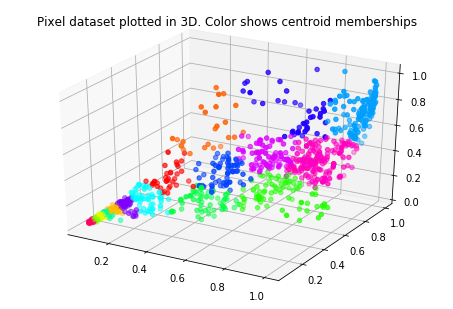

In [162]:
palette = np.matrix('[1,0,0;1,0.375,0;1,0.75,0;0.875,1,0;0.5,1,0;0.125,1,0;0,1,0.25;0,1,0.625;0,1,1;0,0.625,1;0,0.25,1;0.125,0,1;0.5,0,1;0.875,0,1;1,0,0.75;1,0,0.375]').A
idx = idx.astype(int)
colors = palette[idx[sel].ravel(),:]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[sel,0], X[sel,1], X[sel,2], c=colors)
fig.suptitle('Pixel dataset plotted in 3D. Color shows centroid memberships\n');


## Part 8(b): Optional (ungraded) Exercise: PCA for Visualization

In [182]:
def plotDataPoints(X, idx, K):
#PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
#index assignments in idx have the same color
#   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
#   with the same index assignments in idx have the same color

    # Create palette
    palette = np.matrix('[1,0,0;1,0.35294,0;1,0.70588,0;0.94118,1,0;0.58824,1,0;0.23529,1,0;0,1,0.11765;0,1,0.47059;0,1,0.82353;0,0.82353,1;0,0.47059,1;0,0.11765,1;0.23529,0,1;0.58824,0,1;0.94118,0,1;1,0,0.70588;1,0,0.35294]').A
    colors = palette[idx.ravel(), :]

    # Plot the data
    plt.scatter(X[:,0], X[:,1], 15, c=colors)


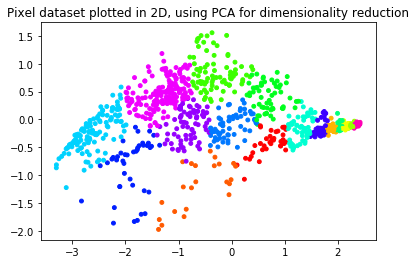

In [184]:
# Use PCA to project this cloud to 2D for visualization

# Subtract the mean to use PCA
X_norm, mu, sigma = featureNormalize(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

# Plot in 2D
#plt.figure
plotDataPoints(Z[sel, :], idx[sel], K)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');